In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head(10)
df.info()
df.describe()
df.columns
df.rename(index=str, columns={'gender':'Gender', 
                              'NationalITy':'Nationality',
                              'raisedhands':'RaisedHands',
                              'VisITedResources':'VisitedResources'},
                               inplace=True)
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
print("Class Unique Values : ", df["Class"].unique())
print("Topic Unique Values : ", df["Topic"].unique())
print("StudentAbsenceDays Unique Values : ", df["StudentAbsenceDays"].unique())
print("ParentschoolSatisfaction Unique Values : ", df["ParentschoolSatisfaction"].unique())
print("Relation Unique Values : ", df["Relation"].unique())
print("SectionID Unique Values : ", df["SectionID"].unique())
print("Gender Unique Values : ", df["Gender"].unique())
X = df.drop('Class',axis=1)
y = df['Class']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Cat_Colums = X.dtypes.pipe(lambda X: X[X=='object']).index
for col in Cat_Colums:
    X[col] = label.fit_transform(X[col])
X.head(5)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)
###########################################
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Naive Bayes
nb =  GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

print("Accuracy of naive bayees algorithm: ",nb.score(x_test,y_test))
##############################################
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
#accuracy
print("accuracy of svm algorithm: ",svm.score(x_test,y_test))
##########################################
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#fit
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#accuracy
print("accuracy of svm algorithm: ",lr.score(x_test,y_test))

exploratory data analysis (EDA)
refer to critical process of performing initial investigations on data so as to discover patterns to spot anomalies to test hypothesis and to check assumptions with the help of summary statistics and graphical representation
    

In [2]:
for i in range(1,17):
    print(df.iloc[:,i].value_counts())
    print("*"*20)
    

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: Nationality, dtype: int64
********************
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Syria            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
********************
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
********************
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
********************
A    283
B    167
C     30
Name: SectionID, dtype: int64
********************
IT   

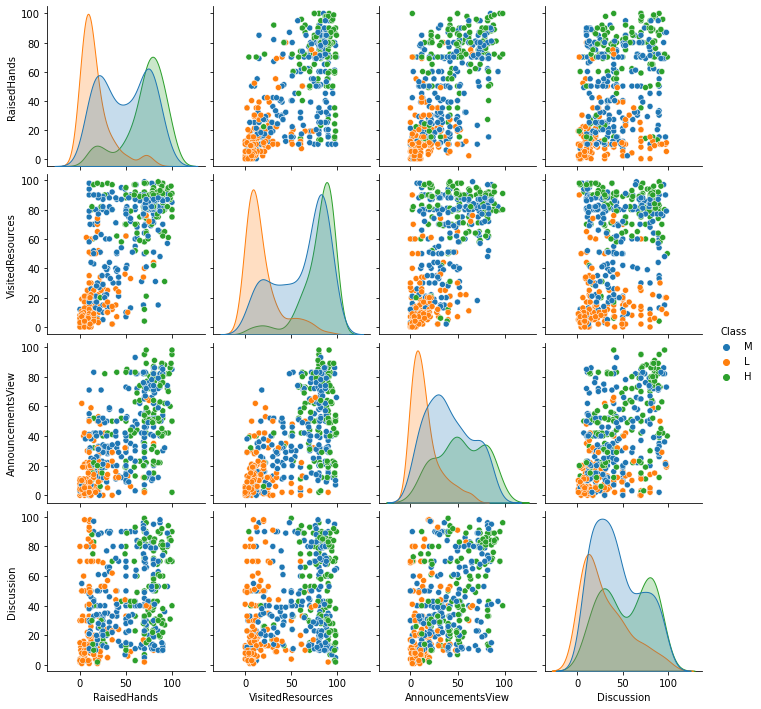

In [3]:
sns.pairplot(df,hue='Class')

<AxesSubplot:>

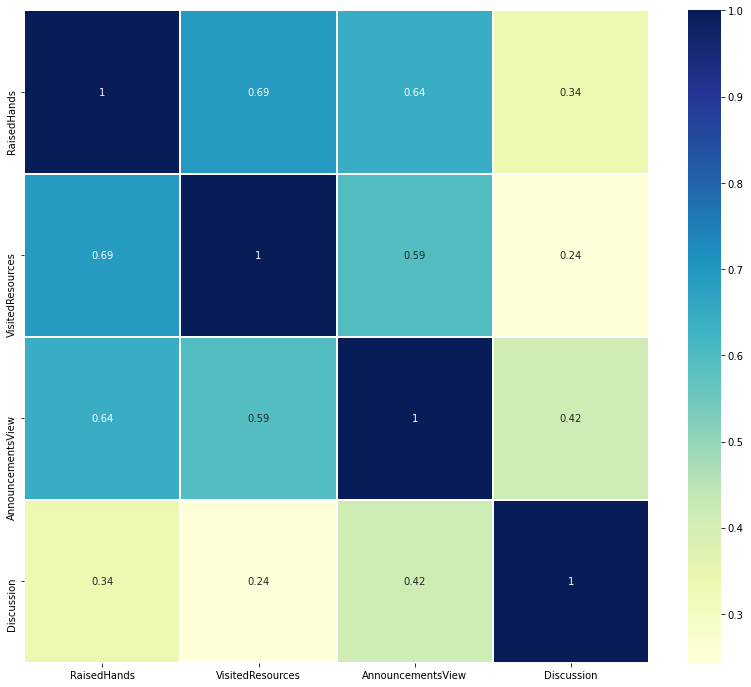

In [4]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=1,cmap="YlGnBu",annot=True)
#plt.yticks(rotation=0)


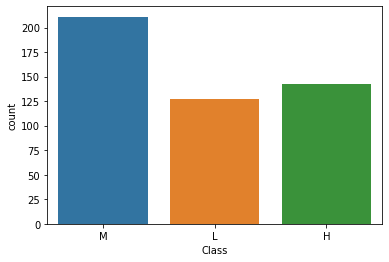

In [5]:
# plot label 
# kiem tra phan bo cua labels co deu hay khong?
# neu can bang=>co the su dung truc tiep duoc
P_satis = sns.countplot(x = "Class", data = df)

<AxesSubplot:>

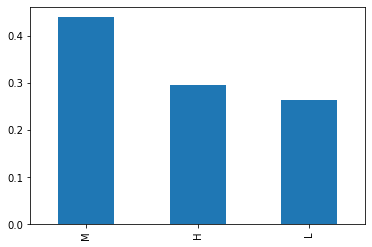

In [6]:
"""nhận xét feature A và B có tương quan cao (0.69),kiểm tra lại mối tương quan của hai fetures"""
df.Class.value_counts(normalize=True).plot(kind='bar')

In [7]:
df.Class.value_counts()


M    211
H    142
L    127
Name: Class, dtype: int64

In [8]:
df.Class.value_counts(normalize=True)


M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64

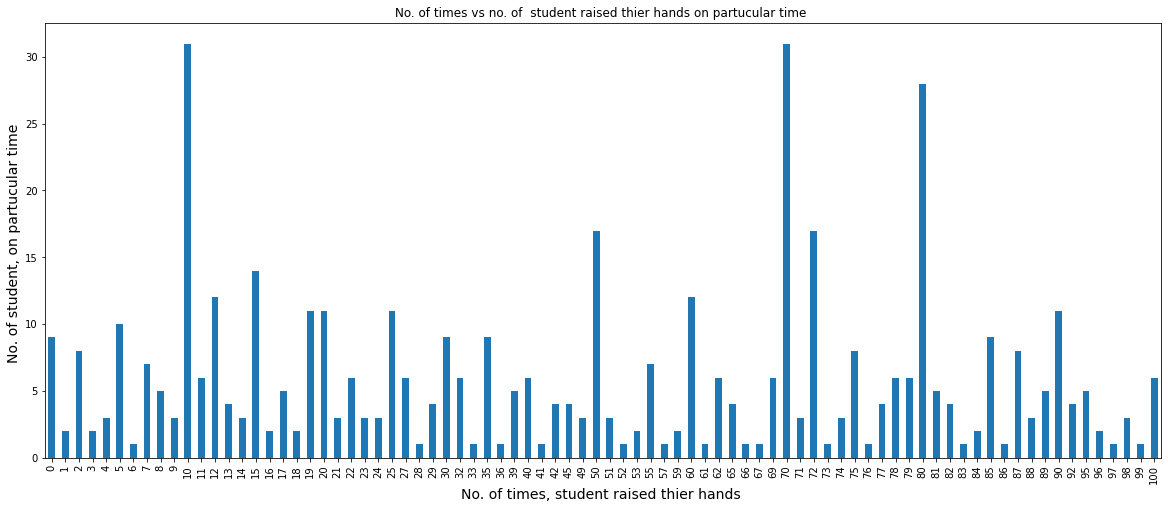

In [9]:
plt.subplots(figsize=(20,8))
df["RaisedHands"].value_counts().sort_index().plot.bar()
plt.title("No. of times vs no. of  student raised thier hands on partucular time " )
plt.xlabel("No. of times, student raised thier hands ", fontsize = 14 )
plt.ylabel("No. of student, on partucular time ",fontsize = 14 )
plt.show()



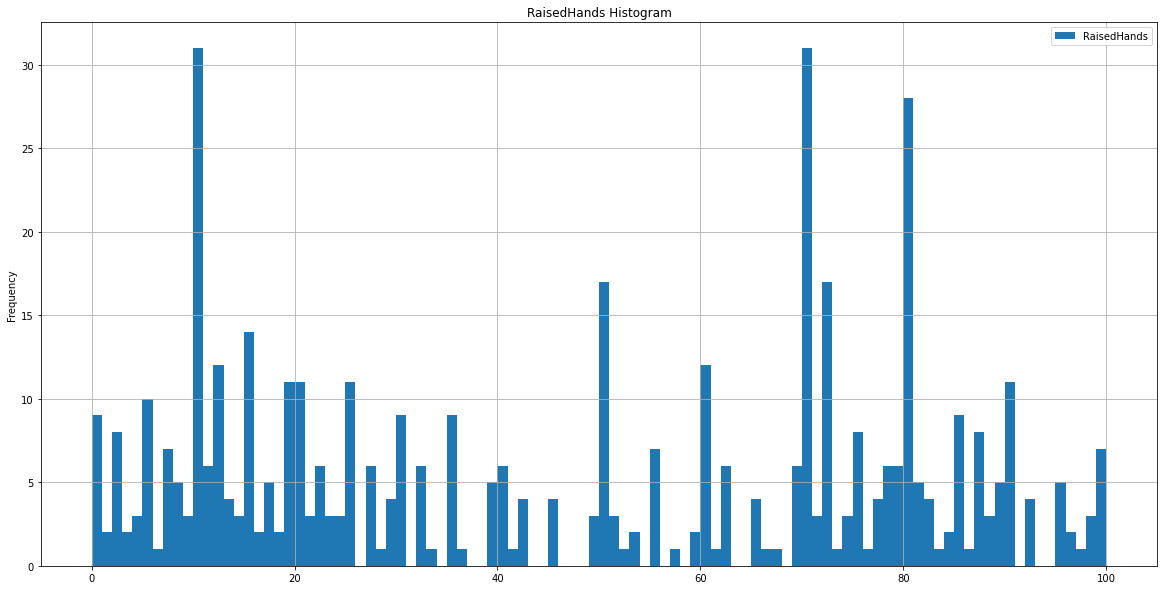

In [10]:
df.RaisedHands.plot(kind="hist",bins =100 ,figsize= (20,10),grid="True")
plt.xlabel=("RaisedHands")
plt.legend(loc="upper right")
plt.title("RaisedHands Histogram")
plt.show()

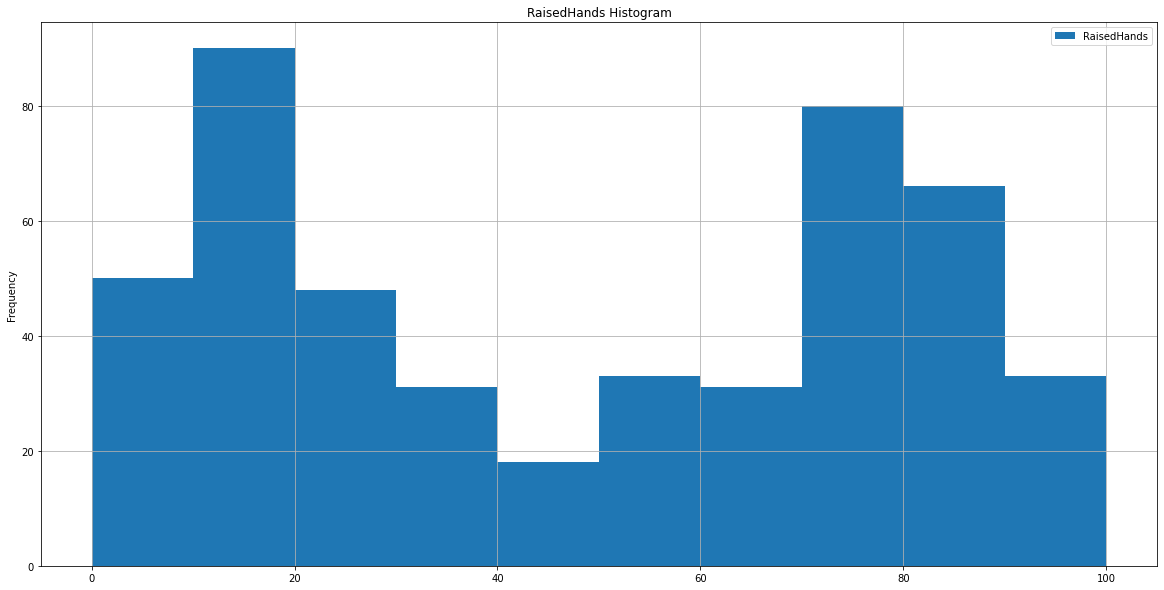

In [11]:
df.RaisedHands.plot(kind="hist",bins =10 ,figsize= (20,10),grid="True")
plt.xlabel=("RaisedHands")
plt.legend(loc="upper right")
plt.title("RaisedHands Histogram")
plt.show()

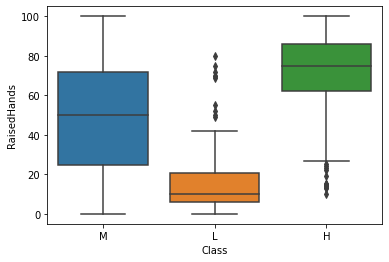

In [12]:
Raised_hand=sns.boxplot(x="Class",y="RaisedHands",data=df)
plt.show()

/home/chi/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


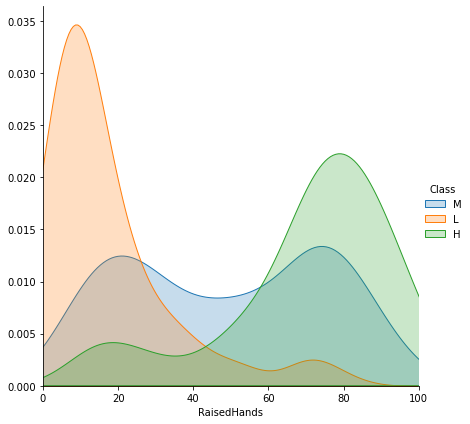

In [13]:
Facetgrid= sns.FacetGrid(df,hue ="Class" ,height = 6)
Facetgrid.map(sns.kdeplot,"RaisedHands",shade = True )
Facetgrid.set(xlim=(0,df['RaisedHands'].max()))
Facetgrid.add_legend()


In [14]:
df.groupby(['ParentschoolSatisfaction'])['Class'].value_counts()

ParentschoolSatisfaction  Class
Bad                       L         84
                          M         80
                          H         24
Good                      M        131
                          H        118
                          L         43
Name: Class, dtype: int64

In [15]:
pd.crosstab(df['Class'], df['ParentschoolSatisfaction'])

ParentschoolSatisfaction,Bad,Good
Class,,
H,24,118
L,84,43
M,80,131


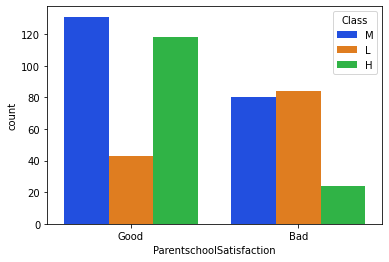

In [16]:
sns.countplot(x = "ParentschoolSatisfaction", data = df, hue = "Class",palette="bright")
plt.show()

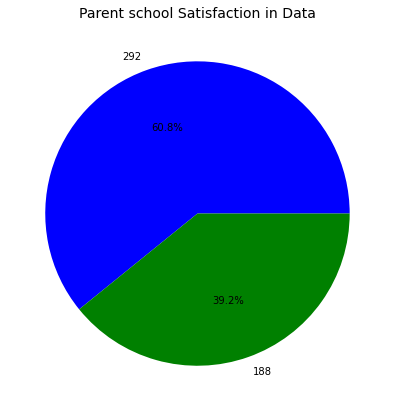

In [17]:
labels=df.ParentschoolSatisfaction.value_counts()
colors=["blue" , "green"]
explode=[0,0]
sizes=df.ParentschoolSatisfaction.value_counts().values

plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Parent school Satisfaction in Data",fontsize=14)
plt.show()